In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [11]:
def sigmoid(Y_in):
    return 1 / (1 + np.exp(-Y_in))

In [12]:
def find_Yhat(X, w, b):
    # IF LIST OF LIST / LIST OF TUPLE IS USED, THEN INDIVIDUAL LIST/TUPLE SHOULD BE HANDLED DIFFERENTLY
    if type(X) in [type([1]), type((1,2))]:
        Y_in = np.dot(X, w) + b
    else:
        Y_in = X * w + b

    return sigmoid(Y_in)

In [13]:
def delta_w(X, Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred) * X

In [14]:
def delta_b(Y_true, Y_pred):
  return -2 * (Y_true - Y_pred) * Y_pred * (1 - Y_pred)

In [15]:
X = [0.5, 2.5]
Y = [0.2, 0.9]

In [16]:
n_epochs = 300
df = pd.DataFrame([(x, y) for x, y in zip(X, Y)], columns = ['X', 'Y'])
df.head()

,X,Y
0,0.5,0.2
1,2.5,0.9


MINI BATCH


In [17]:
def miniBatch_gradient_descent(X, Y, noofepochs = 300, batch_size=2):
    w = -2; alpha = 1; b = -2;
    dw, db = 0, 0
    count = 0
    # LIST FOR ALL EPOCHS
    error_mega_list = []
    weights_mega_list = []
    bias_mega_list = []
        
    for i in range(noofepochs):
        # LIST FOR EACH EPOCH
        error_list = []

        for x, y in zip(X, Y):
            Y_hat = find_Yhat(x, w, b)
            error_list.append((y - Y_hat) ** 2)
            dw += delta_w(x, y, Y_hat)
            db += delta_b(y, Y_hat)
            count += 1

            if(count % batch_size == 0):
                w += (-alpha * dw/batch_size)
                b += (-alpha * db/batch_size)
                dw, db = 0, 0
        
        error_mega_list.append(error_list)
        weights_mega_list.append(w)
        bias_mega_list.append(b)
        
    return error_mega_list, weights_mega_list, bias_mega_list

In [18]:
errors_mbgd, weights_mbgd, biases_mbgd = miniBatch_gradient_descent(X, Y, n_epochs)

In [22]:
print(round(np.mean(errors_mbgd[-1]),5))
print(round(weights_mbgd[-1],3))
print(round(biases_mbgd[-1],3))

6e-05
1.733
-2.198


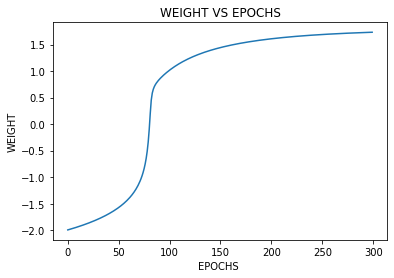

In [19]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in weights_mbgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()

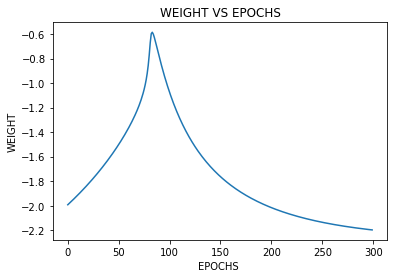

In [20]:
plt.title("WEIGHT VS EPOCHS")
epoch_range = [i for i in range(n_epochs)]
weight_range = [w for w in biases_mbgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()

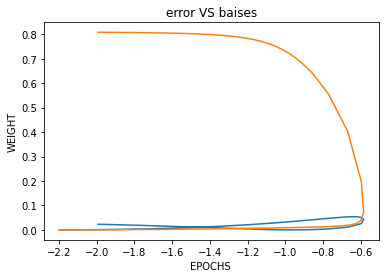

In [23]:
plt.title("error VS baises")
epoch_range = [i for i in biases_mbgd]
weight_range = [w for w in errors_mbgd]
plt.plot(epoch_range, weight_range)
plt.xlabel('EPOCHS ')
plt.ylabel('WEIGHT')
plt.show()